## Data 620 Project 2
### Lin Li and Tony Mai
Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

In [53]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
from operator import itemgetter
import networkx.algorithms.bipartite as bipartite
from networkx.algorithms import community #This is part of networkx, for community detection
import pandas as pd
import csv

### Plant - pollinator network

In ecological studies, species interactions such as preditor-prey, host-parasite, and plant-pollinator represent bipartite networks. Analyzing these interactions in a network allows us to organize and quantify community structures and understand community robustness and resilience. 

The data for this project came from The Web of Life project is developed at Jordi Bascompte's lab (www.bascompte.net), a research group focused on the structure and dynamics of ecological networks. 

In [54]:
# load dataset
df = pd.read_csv("M_PL_021.csv")

# convert adjacency matrix to source - target format
df.columns.values[0] = 'Pollinator'
result = pd.melt(df,id_vars=['Pollinator'])
filtered = result[result['value'] == 1].rename(columns={'Pollinator': 'source', 'variable': 'target'})

# get network info
G = nx.from_pandas_edgelist(filtered)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 768
Number of edges: 1193
Average degree:   3.1068


In [55]:
# check if network is 2-mode
nx.is_bipartite(G)

True

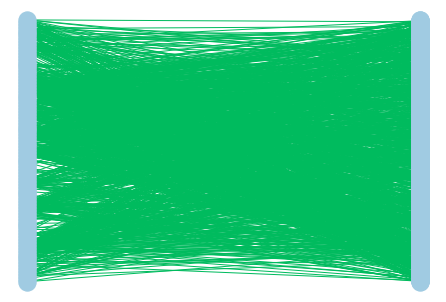

In [56]:
# graph bipartite network

sub_data = filtered

edges = [tuple(x) for x in sub_data[['source','target']].values.tolist()]
B = nx.Graph()
B.add_nodes_from(sub_data['source'].unique(), bipartite=0)
B.add_nodes_from(sub_data['target'].unique(), bipartite=1)
B.add_edges_from(edges, label='value')

# First specify the nodes for left or top
left_or_top = sub_data['source'].unique()

# Then create a bipartite layout
pos = nx.bipartite_layout(B, left_or_top)

nx.draw(B,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,
     edge_cmap=plt.cm.Blues)

In [57]:
# explore node degree 
node_degree = G.degree()
df_degree = pd.DataFrame(node_degree)
df_degree.columns =['Species', 'Degree']
df_degree = df_degree.sort_values(by=['Degree'],ascending=False)
df_degree.head(-10)

,Species,Degree
58,Anthriscus aemula,188
0,Hydrangea paniculata,75
60,Euonymus alatus,66
2,Hydrangea macrophylla,50
3,Weigela hortensis,45
...,...,...
421,Unidentified sp111 M_PL_021,1
420,Unidentified sp110 M_PL_021,1
419,Unidentified sp109 M_PL_021,1
418,Unidentified sp108 M_PL_021,1


In [58]:
# remove nodes with Degree of 1
import copy
G_reduced = copy.deepcopy(G)
to_be_removed = [x for x in G_reduced.nodes() if G_reduced.degree(x) <= 1]

for x in to_be_removed:
    G_reduced.remove_node(x)
 
print(nx.info(G_reduced))


Name: 
Type: Graph
Number of nodes: 242
Number of edges: 668
Average degree:   5.5207


In [59]:
# reconstruct node lists from reduced network
pollinators = []
plants = []


for x in list(filtered.target.unique()):
    if x not in to_be_removed:
        pollinators.append(x)
for x in list(filtered.source.unique()):
    if x not in to_be_removed:
        plants.append(x)


In [60]:
# convert network to adjacency matrix 
df_reduced = nx.to_pandas_adjacency(G_reduced, dtype=int)
df_reduced.head(3)

,Hydrangea paniculata,Bombus diversus diversus,Hydrangea macrophylla,Weigela hortensis,Deutzia crenata,Persicaria thunbergii,Corydalis lineariloba,Cirsium kagamontanum,Persicaria senticosa,Hovenia tomentella,...,Unidentified sp39 M_PL_021,Unidentified sp40 M_PL_021,Unidentified sp41 M_PL_021,Unidentified sp42 M_PL_021,Unidentified sp43 M_PL_021,Unidentified sp44 M_PL_021,Unidentified sp45 M_PL_021,Unidentified sp46 M_PL_021,Unidentified sp47 M_PL_021,Unidentified sp48 M_PL_021
Hydrangea paniculata,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Bombus diversus diversus,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Hydrangea macrophylla,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# construct bipartite network with reduced adjacency matrix
B = nx.Graph()
B.add_nodes_from(df_reduced.index, bipartite=0)
B.add_nodes_from(df_reduced.columns, bipartite=1)

s = df_reduced.stack()
B.add_edges_from(s[s==1].index)
print(nx.info(B))

# check if is bipartite
nx.is_bipartite(B)

Name: 
Type: Graph
Number of nodes: 242
Number of edges: 668
Average degree:   5.5207


True

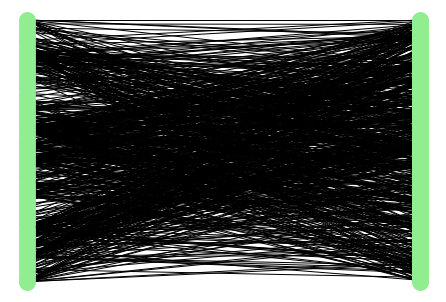

In [62]:
# graph reduced bipartite network
top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)

nx.draw(B, pos=pos, 
        node_color='lightgreen', 
        node_size=250)

In [63]:
# project bipartite graph onto plants nodes
W_plants = bipartite.projected_graph(G_reduced, plants)
W_plants = bipartite.weighted_projected_graph(G_reduced, plants)

# project bipartite graph onto pollinators nodes
C_pollinators = bipartite.projected_graph(G_reduced, pollinators)
C_pollinators = bipartite.weighted_projected_graph(G_reduced, pollinators)

In [64]:
# get degree centrality
centrality_W_plants = nx.degree_centrality(W_plants)
centrality_C_pollinators = nx.degree_centrality(C_pollinators)

In [65]:
# Degree Centrality for plants
SortedCentrality_W_plants = sorted(centrality_W_plants.items(), key=itemgetter(1), reverse=True)
df_centrality_W_plants = pd.DataFrame(SortedCentrality_W_plants, columns =['Plant Name', 'Degree Centrality']) 

# Degree Centrality for pollinators 
SortedCentrality_C_pollinators = sorted(centrality_C_pollinators.items(), key=itemgetter(1), reverse=True)
df_centrality_C_pollinators = pd.DataFrame(SortedCentrality_C_pollinators, columns =['Pollinator Name', 'Degree Centrality']) 

# Degree Centrality for combined
Centrality_combined = pd.concat([df_centrality_W_plants, df_centrality_C_pollinators], axis=1)
Top_Centrality_combined = Centrality_combined[:10]
Top_Centrality_combined

,Plant Name,Degree Centrality,Pollinator Name,Degree Centrality
0,Weigela hortensis,0.890625,Eristalis cerealis,0.880682
1,Rabdosia trichocarpa,0.812500,Lasioglossum apristum,0.818182
2,Hydrangea paniculata,0.796875,Mordellistena sp1 M_PL_021,0.801136
3,Deutzia crenata,0.781250,Unidentified sp1 M_PL_021,0.738636
4,Cirsium kagamontanum,0.781250,Sphaerophoria menthastri,0.727273
5,Geranium nepalense,0.781250,Lasioglossum transpositum,0.670455
6,Anthriscus aemula,0.781250,Ceratina megastigmata,0.647727
7,Hydrangea macrophylla,0.750000,Bombus hypocrita hypocrita,0.642045
8,Persicaria thunbergii,0.734375,Melanostoma scalare,0.613636
9,Astilbe thunbergii,0.718750,Graphomyia maculata,0.613636


For the plants network, we observed, Weigela hortensis, Rabdosia trichocarpa, and Hydrangea paniculata have the highest centrality. For the pollinators, species with the highest centrality are Eristalis cerealis, Lasioglossum apristum, and Mordellistena sp1 M_PL_021. 

In [66]:
# get betweenness values 
Btw_W_plants = nx.betweenness_centrality(W_plants) 
Btw_C_pollinators = nx.betweenness_centrality(C_pollinators)

In [67]:
# betweenness centrality for plants
SortedBtw_W_plants = sorted(Btw_W_plants.items(), key=itemgetter(1), reverse=True)
df_Btw_W_plants = pd.DataFrame(SortedBtw_W_plants, columns =['Plant Name', 'Betweenness Centrality']) 

# betweenness centrality for pollinators
SortedBtw_C_pollinators = sorted(Btw_C_pollinators.items(), key=itemgetter(1), reverse=True)
df_Btw_C_pollinators = pd.DataFrame(SortedBtw_C_pollinators, columns =['Pollinator Name', 'Betweenness Centrality']) 

# Degree betweenness for combined
between_combined = pd.concat([df_Btw_W_plants, df_Btw_C_pollinators], axis=1)
Top_between_combined = between_combined[:10]
Top_between_combined

,Plant Name,Betweenness Centrality,Pollinator Name,Betweenness Centrality
0,Anthriscus aemula,0.045403,Eristalis cerealis,0.054179
1,Weigela hortensis,0.035176,Ceratina megastigmata,0.042008
2,Rabdosia trichocarpa,0.027508,Lasioglossum apristum,0.035986
3,Deutzia crenata,0.023717,Mordellistena sp1 M_PL_021,0.030890
4,Hydrangea paniculata,0.022918,Bombus hypocrita hypocrita,0.028174
5,Angelica pubescens,0.021950,Sphaerophoria menthastri,0.027503
6,Euonymus alatus,0.019662,Unidentified sp1 M_PL_021,0.022049
7,Hydrangea macrophylla,0.018989,Melanostoma scalare,0.020255
8,Astilbe thunbergii,0.018557,Bombus diversus diversus,0.019043
9,Corydalis lineariloba,0.018065,Bombus honshuensis,0.018335


Betweenness centrality identifies important nodes not because they have a lot of connections but because they stand in between groups, giving the network connectivity and cohesion. The most central plants are Anthriscus aemula, Weigela hortensis, and Rabdosia trichocarpa, and the most central pollinators are Eristalis cerealis, Ceratina megastigmata, and Lasioglossum apristum, respectively.

In [68]:
# get eigenvector centrality values 
eigen_W_plants = nx.eigenvector_centrality(W_plants)
eigen_C_pollinators = nx.eigenvector_centrality(C_pollinators)

In [69]:
# eigenvector values for plant network
SortedEigen_W_plants = sorted(eigen_W_plants.items(), key=itemgetter(1), reverse=True)
df_eigen_W_plants = pd.DataFrame(SortedEigen_W_plants, columns =['Plant Name', 'Eigenvector Centrality']) 

# eigenvector values for pollinator network
SortedEigen_C_pollinators = sorted(eigen_C_pollinators.items(), key=itemgetter(1), reverse=True)
df_eigen_C_pollinators = pd.DataFrame(SortedEigen_C_pollinators, columns =['Pollinator Name', 'Eigenvector Centrality']) 

# eigenvector values for combined
eigen_combined = pd.concat([df_eigen_W_plants, df_eigen_C_pollinators], axis=1)
Top_eigen_combined = eigen_combined[:10]
Top_eigen_combined

,Plant Name,Eigenvector Centrality,Pollinator Name,Eigenvector Centrality
0,Weigela hortensis,0.194346,Eristalis cerealis,0.152844
1,Geranium nepalense,0.182048,Lasioglossum apristum,0.149204
2,Cirsium kagamontanum,0.181986,Mordellistena sp1 M_PL_021,0.148366
3,Rabdosia trichocarpa,0.181256,Unidentified sp1 M_PL_021,0.143584
4,Hydrangea paniculata,0.179669,Sphaerophoria menthastri,0.136680
5,Deutzia crenata,0.174590,Lasioglossum transpositum,0.135608
6,Persicaria thunbergii,0.171521,Melanostoma scalare,0.124776
7,Hydrangea macrophylla,0.170534,Graphomyia maculata,0.122421
8,Anthriscus aemula,0.165429,Episyrphus balteatus,0.122406
9,Swida controversa,0.165208,Oedemeronia manicata,0.121839


A high eigenvector score means that a node is connected to many nodes who themselves have high scores. For the pollinators network we have Eristalis cerealis that connects to many nodes themselves with high eigenvector values. For the plants, we have Weigela hortensis connecting to many other high eigenvector nodes, followed by Geranium nepalense, Cirsium kagamontanum, and Rabdosia trichocarpa.

In [70]:
# all measures for plants
All_Measures_plants = pd.concat([df_centrality_W_plants, df_Btw_W_plants, df_eigen_W_plants], axis=1)

Top_Measures_plants = All_Measures_plants[:10]
Top_Measures_plants

,Plant Name,Degree Centrality,Plant Name,Betweenness Centrality,Plant Name,Eigenvector Centrality
0,Weigela hortensis,0.890625,Anthriscus aemula,0.045403,Weigela hortensis,0.194346
1,Rabdosia trichocarpa,0.812500,Weigela hortensis,0.035176,Geranium nepalense,0.182048
2,Hydrangea paniculata,0.796875,Rabdosia trichocarpa,0.027508,Cirsium kagamontanum,0.181986
3,Deutzia crenata,0.781250,Deutzia crenata,0.023717,Rabdosia trichocarpa,0.181256
4,Cirsium kagamontanum,0.781250,Hydrangea paniculata,0.022918,Hydrangea paniculata,0.179669
5,Geranium nepalense,0.781250,Angelica pubescens,0.021950,Deutzia crenata,0.174590
6,Anthriscus aemula,0.781250,Euonymus alatus,0.019662,Persicaria thunbergii,0.171521
7,Hydrangea macrophylla,0.750000,Hydrangea macrophylla,0.018989,Hydrangea macrophylla,0.170534
8,Persicaria thunbergii,0.734375,Astilbe thunbergii,0.018557,Anthriscus aemula,0.165429
9,Astilbe thunbergii,0.718750,Corydalis lineariloba,0.018065,Swida controversa,0.165208


In [71]:
# all measures for pollinators
All_Measures_pollinators = pd.concat([df_centrality_C_pollinators, df_Btw_C_pollinators, df_eigen_C_pollinators], axis=1)

Top_Measures_pollinators = All_Measures_pollinators[:10]
Top_Measures_pollinators

,Pollinator Name,Degree Centrality,Pollinator Name,Betweenness Centrality,Pollinator Name,Eigenvector Centrality
0,Eristalis cerealis,0.880682,Eristalis cerealis,0.054179,Eristalis cerealis,0.152844
1,Lasioglossum apristum,0.818182,Ceratina megastigmata,0.042008,Lasioglossum apristum,0.149204
2,Mordellistena sp1 M_PL_021,0.801136,Lasioglossum apristum,0.035986,Mordellistena sp1 M_PL_021,0.148366
3,Unidentified sp1 M_PL_021,0.738636,Mordellistena sp1 M_PL_021,0.030890,Unidentified sp1 M_PL_021,0.143584
4,Sphaerophoria menthastri,0.727273,Bombus hypocrita hypocrita,0.028174,Sphaerophoria menthastri,0.136680
5,Lasioglossum transpositum,0.670455,Sphaerophoria menthastri,0.027503,Lasioglossum transpositum,0.135608
6,Ceratina megastigmata,0.647727,Unidentified sp1 M_PL_021,0.022049,Melanostoma scalare,0.124776
7,Bombus hypocrita hypocrita,0.642045,Melanostoma scalare,0.020255,Graphomyia maculata,0.122421
8,Melanostoma scalare,0.613636,Bombus diversus diversus,0.019043,Episyrphus balteatus,0.122406
9,Graphomyia maculata,0.613636,Bombus honshuensis,0.018335,Oedemeronia manicata,0.121839


## Learn the most important players in 

### Plants

Weigela hortensis - commonly called weigela, in the honeysuckle family.

Hydrangea paniculata - Hydrangea have both sterile and fertile flowers and attract a lot of bees, butterflies and other pollinators.

Geranium nepalense - Nepalese Crane's Bill, pollinated by all kinds of insects.

Anthriscus aemula - common plant in the parsely family.

### Pollinators
Eristalis cerealis -  a type of hoverfly, one of the most abundant groups of flower visiting insects. Important pollinators of many wild plants.

Lasioglossum apristum - a type of sweat bee, known as generalist pollinators.

Mordellistena sp1 - Tumbling Flower Beetles, do not feed on nectar. Instead, they feast on the protein-rich pollen.

Ceratina megastigmata -  a bee species, widespread.

In [77]:
g = Network(height = 800, width = 800, notebook = True)
g.toggle_hide_edges_on_drag(False)
g.barnes_hut()
g.from_nx(B)
g.show("ex.html")